## This Jupyter notebook is used to illustrate the algorithm for Linear Regression problem

In [1]:
import numpy as np
import scipy.linalg as lin
import matplotlib.pyplot as plt

% matplotlib inline
% matplotlib notebook

### 1. Prepare Data

For this section, I will not use the already existed dataset, such as UCI. Instead, I will use numpy to generate random points

In [2]:
x = np.linspace(0, 10, 100)

mu=0.0;
sigma=3.0

delta = np.random.normal(mu, sigma, x.size)
y = 2*x + 3 + delta

<IPython.core.display.Javascript object>


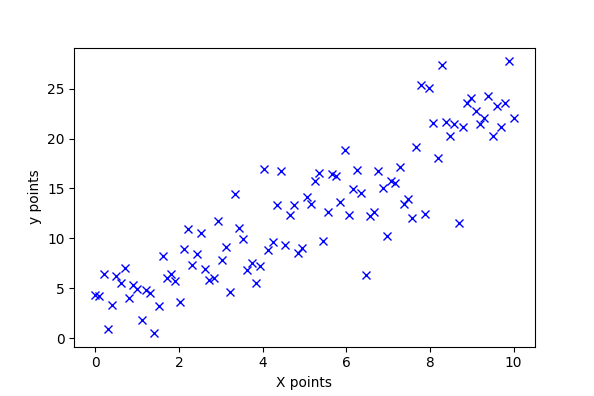

[]

In [3]:
fig,ax=plt.subplots(1,1)

ax.plot(x,y,'bx')
ax.set_xlabel('X points')
ax.set_ylabel('y points')

plt.plot()

### 2.  Initialize the problem

In [4]:
import pandas as pd

In [5]:
## Reshape the array so that we can build the data frame
x.reshape((1,len(x)))

array([[  0.        ,   0.1010101 ,   0.2020202 ,   0.3030303 ,
          0.4040404 ,   0.50505051,   0.60606061,   0.70707071,
          0.80808081,   0.90909091,   1.01010101,   1.11111111,
          1.21212121,   1.31313131,   1.41414141,   1.51515152,
          1.61616162,   1.71717172,   1.81818182,   1.91919192,
          2.02020202,   2.12121212,   2.22222222,   2.32323232,
          2.42424242,   2.52525253,   2.62626263,   2.72727273,
          2.82828283,   2.92929293,   3.03030303,   3.13131313,
          3.23232323,   3.33333333,   3.43434343,   3.53535354,
          3.63636364,   3.73737374,   3.83838384,   3.93939394,
          4.04040404,   4.14141414,   4.24242424,   4.34343434,
          4.44444444,   4.54545455,   4.64646465,   4.74747475,
          4.84848485,   4.94949495,   5.05050505,   5.15151515,
          5.25252525,   5.35353535,   5.45454545,   5.55555556,
          5.65656566,   5.75757576,   5.85858586,   5.95959596,
          6.06060606,   6.16161616,   6.

In [6]:
## in order to take the bias term into account, we use pandas
x_df=pd.DataFrame(x.T,index=np.arange(1,101),columns=['x'])

x_df.head()

,x
1,0.00000
2,0.10101
3,0.20202
4,0.30303
5,0.40404


In [7]:
## Add bias term

x_df['x0']=1

x_df.head()

,x,x0
1,0.00000,1
2,0.10101,1
3,0.20202,1
4,0.30303,1
5,0.40404,1


In [8]:
x_train=x_df.values
x_train

array([[  0.        ,   1.        ],
       [  0.1010101 ,   1.        ],
       [  0.2020202 ,   1.        ],
       [  0.3030303 ,   1.        ],
       [  0.4040404 ,   1.        ],
       [  0.50505051,   1.        ],
       [  0.60606061,   1.        ],
       [  0.70707071,   1.        ],
       [  0.80808081,   1.        ],
       [  0.90909091,   1.        ],
       [  1.01010101,   1.        ],
       [  1.11111111,   1.        ],
       [  1.21212121,   1.        ],
       [  1.31313131,   1.        ],
       [  1.41414141,   1.        ],
       [  1.51515152,   1.        ],
       [  1.61616162,   1.        ],
       [  1.71717172,   1.        ],
       [  1.81818182,   1.        ],
       [  1.91919192,   1.        ],
       [  2.02020202,   1.        ],
       [  2.12121212,   1.        ],
       [  2.22222222,   1.        ],
       [  2.32323232,   1.        ],
       [  2.42424242,   1.        ],
       [  2.52525253,   1.        ],
       [  2.62626263,   1.        ],
 

In [9]:
y

array([  4.33106483,   4.25891448,   6.40528027,   0.93467138,
         3.28129032,   6.17823699,   5.51448386,   7.00083169,
         4.05876204,   5.32712585,   4.86880097,   1.76315795,
         4.77201376,   4.54835983,   0.51130588,   3.20082308,
         8.25481009,   6.05548305,   6.39883493,   5.6856317 ,
         3.57703393,   8.87668024,  10.89278978,   7.30237201,
         8.4685246 ,  10.57868527,   6.87813404,   5.82116998,
         6.06110923,  11.75781705,   7.85513763,   9.16072041,
         4.65810604,  14.42532639,  10.99597732,   9.9297058 ,
         6.85244249,   7.47377634,   5.55513949,   7.20720284,
        16.93054377,   8.79724878,   9.66868168,  13.34386953,
        16.790295  ,   9.29919333,  12.3154715 ,  13.36890779,
         8.56000964,   9.0607766 ,  14.10677213,  13.42664146,
        15.73325637,  16.54026556,   9.67871787,  12.66328864,
        16.42651187,  16.20406017,  13.61138687,  18.83242678,
        12.30194027,  14.91638594,  16.81924603,  14.56

### 3. Gradient descent

In [10]:
def gradient_descent(x,y,theta,alpha,iteration=2000):
    iter_num=0;
    
    while iter_num<=iteration:
        gradient_sum_squares = 0
        for i in range(len(theta)):
            derivative=np.sum(np.dot(y-x.dot(theta),x[:,i]))
            theta[i]=theta[i]+alpha*derivative
        iter_num=iter_num+1
    return theta
        

In [11]:
theta=np.array([0,0],dtype=float)

gradient_descent(x_train,y,theta,1e-4,2500)

array([ 2.03545316,  2.46226525])

#### 3.1 Convergence test

In [27]:
errors=[]
for i in range(1,10000,300):
    theta=np.array([0,0],dtype=float)
    gradient_descent(x_train,y,theta,1e-4,i)
    y_model=theta[0]*x+theta[1]
    error=np.sqrt(np.dot(y-y_model,y-y_model))/len(y)
    errors.append(error)

<IPython.core.display.Javascript object>


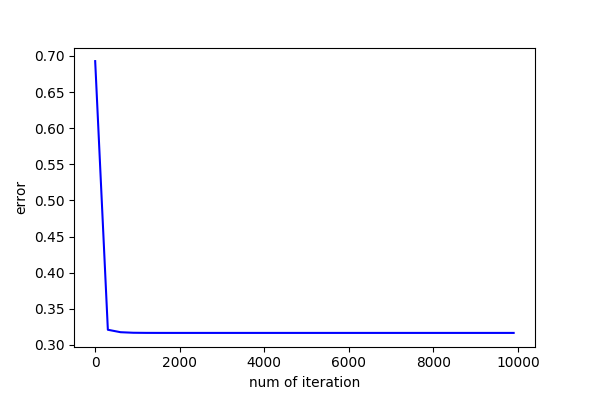

[]

In [28]:
fig,ax=plt.subplots(1,1)

ax.plot(list(range(1,10000,300)),errors,'b-')
ax.set_xlabel('num of iteration')
ax.set_ylabel('error')

plt.plot()

#### 3.2 Compare Data with Model

<IPython.core.display.Javascript object>


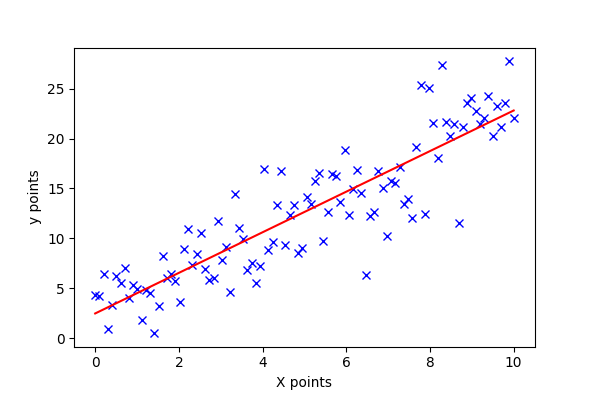

[]

In [12]:
fig,ax=plt.subplots(1,1)

ax.plot(x,y,'bx')
ax.plot(x,theta[0]*x+theta[1],'r-')
ax.set_xlabel('X points')
ax.set_ylabel('y points')

plt.plot()

### 4. Stochastic Gradient Descent

In [41]:
def stochastic_descent(x,y,theta,alpha,iteration=1000):
    iter_num=0;
    
    while iter_num<=iteration:
        for j in range(len(y)):
            for i in range(len(theta)):
                derivative=(y[j]-x[j].dot(theta))*x[j,i]
                theta[i]=theta[i]+alpha*derivative
        iter_num=iter_num+1
    return theta

In [42]:
theta=np.array([0,0],dtype=float)

stochastic_descent(x_train,y,theta,1e-3)

array([ 2.13484176,  2.2723258 ])

#### 4.1 Convergence test

In [44]:
errors=[]
for i in range(1,2000,300):
    theta=np.array([0,0],dtype=float)
    stochastic_descent(x_train,y,theta,1e-3,i)
    y_model=theta[0]*x+theta[1]
    error=np.sqrt(np.dot(y-y_model,y-y_model))/len(y)
    errors.append(error)

<IPython.core.display.Javascript object>


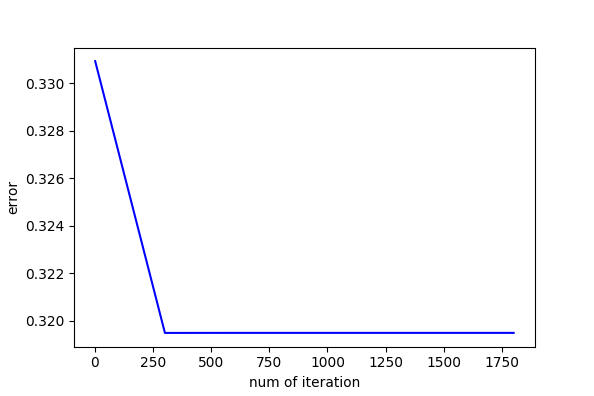

[]

In [46]:
fig,ax=plt.subplots(1,1)

ax.plot(list(range(1,2000,300)),errors,'b-')
ax.set_xlabel('num of iteration')
ax.set_ylabel('error')

plt.plot()

#### 3.2 Compare Data with Model

<IPython.core.display.Javascript object>


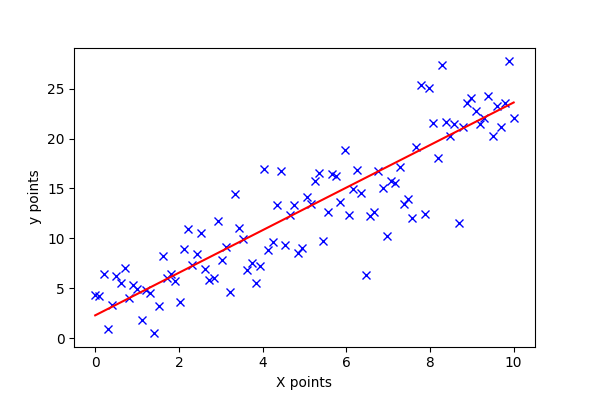

[]

In [43]:
fig,ax=plt.subplots(1,1)

ax.plot(x,y,'bx')
ax.plot(x,theta[0]*x+theta[1],'r-')
ax.set_xlabel('X points')
ax.set_ylabel('y points')

plt.plot()